In [19]:
import numpy as np

import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt

%matplotlib inline

#from pandas.core import datetools

df = pd.read_csv("C:\\Users\\radha\\Desktop\\dsp27 Class\\monthly_milk.csv")

df.head()

,month,milk_prod_per_cow_kg
0,1/1/1962,265.05
1,2/1/1962,252.45
2,3/1/1962,288.00
3,4/1/1962,295.20
4,5/1/1962,327.15


In [20]:
# TO STATIONARITY
from statsmodels.tsa.stattools import kpss

#df['data'] = df['milk_prod_per_cow_kg']

print(" > Is the data stationary ?")
dftest = kpss(np.log(df['milk_prod_per_cow_kg']), 'ct')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[3].items():
    print("\t{}: {}".format(k, v))

 > Is the data stationary ?
Test statistic = 0.154
P-value = 0.043
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                               ARMA Model Results                               
Dep. Variable:     milk_prod_per_cow_kg   No. Observations:                  168
Model:                       ARMA(0, 0)   Log Likelihood                  95.346
Method:                             css   S.D. of innovations              0.137
Date:                  Thu, 18 Nov 2021   AIC                           -186.692
Time:                          13:03:02   BIC                           -180.444
Sample:                               0   HQIC                          -184.157
                                                                                
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8185      0.011    549.773      0.000       5.798       5.839
                               ARIMA Model Results                                
Dep. Variable:     D.milk_prod_p

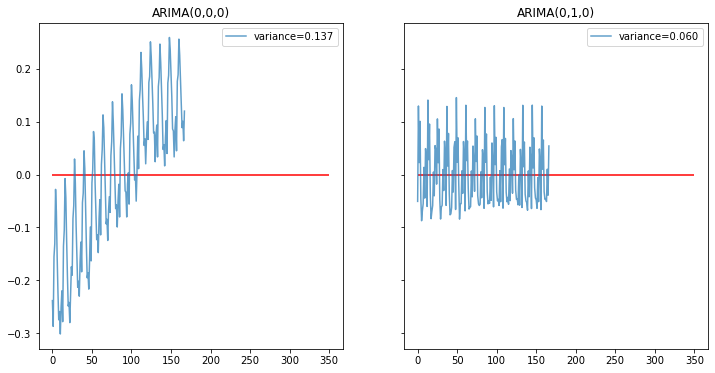

In [21]:
from statsmodels.tsa.arima_model import ARIMA




# check with 0,0,0  | 0,1,0
model = ARIMA(np.log(df['milk_prod_per_cow_kg']).dropna(), (0, 0, 0))
res_000 = model.fit()
print(res_000.summary())

model = ARIMA(np.log(df['milk_prod_per_cow_kg']).dropna(), (0, 1, 0))
res_010 = model.fit()
print(res_010.summary())

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(res_000.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_000.resid.values)));
ax[0].hlines(0, xmin=0, xmax=350, color='r');
ax[0].set_title("ARIMA(0,0,0)");
ax[0].legend();
ax[1].plot(res_010.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_010.resid.values)));
ax[1].hlines(0, xmin=0, xmax=350, color='r');
ax[1].set_title("ARIMA(0,1,0)");
ax[1].legend();

In [6]:
# LOWER AIC is better

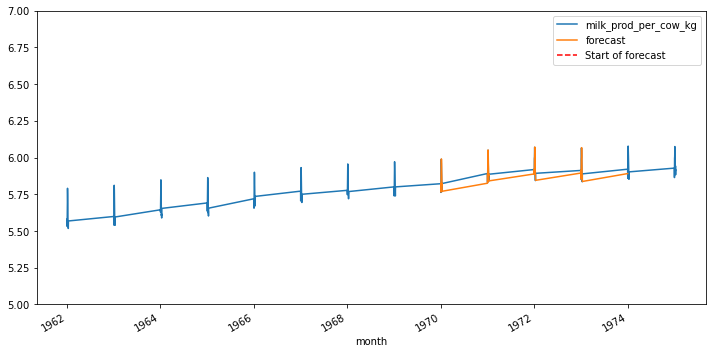

In [62]:

import warnings
warnings.filterwarnings("ignore")

model = ARIMA(np.log(df['milk_prod_per_cow_kg']).dropna()[:-3], (0, 1, 0))
res_111 = model.fit()

fig, ax = plt.subplots(figsize=(12, 6))
df.index = pd.to_datetime(df.month, format="%d/%m/%Y")
np.log(df['milk_prod_per_cow_kg']).dropna()[:600].plot(ax=ax);
ax.vlines('01/01/1970', 13, 14.5, linestyle='--', color='r', label='Start of forecast');
#ax
ax.set_ylim([5, 7])
# - NOTE from the official documentation :
# -- The dynamic keyword affects in-sample prediction. 
# -- If dynamic is False, then the in-sample lagged values are used for prediction. 
# -- If dynamic is True, then in-sample forecasts are used in place of lagged dependent variables.
ax = res_111.plot_predict('01/01/1970', '01/01/1974',dynamic=False, plot_insample=False, ax=ax);

In [50]:
df.head()

,month,milk_prod_per_cow_kg
month,,
1962-01-01,1/1/1962,265.05
1962-01-02,2/1/1962,252.45
1962-01-03,3/1/1962,288.00
1962-01-04,4/1/1962,295.20
1962-01-05,5/1/1962,327.15
